In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import OneHotEncoder

plt.rcParams['figure.figsize'] = (10, 7)
sns.set(style='whitegrid')

file_path = "/home/kali/Desktop/lab/Absenteeism_at_work.csv"
col_names = [
    'ID',
    'Reason for absence',
    'Month of absence',
    'Day of the week',
    'Seasons',
    'Transportation expense',
    'Distance from Residence to Work',
    'Service time',
    'Age',
    'Work load Average/day',
    'Hit target',
    'Disciplinary failure',
    'Education',
    'Son',
    'Social drinker',
    'Social smoker',
    'Pet',
    'Weight',
    'Height',
    'Body mass index',
    'Absenteeism time in hours'
]
print("Блок 1: Імпорт бібліотек завершено.\n")

Блок 1: Імпорт бібліотек завершено.



In [2]:
# Читання CSV з пропущеними даними
df_pd = pd.read_csv(file_path, delimiter=";", header=0, names=col_names, na_values=["?"])

# Видалення рядків з пропущеними даними
df_drop = df_pd.copy()
df_drop.dropna(inplace=True)
df_drop = df_drop.apply(lambda col: col.str.strip() if col.dtype == "object" else col)
df_drop = df_drop[~df_drop.isin(["?"]).any(axis=1)]

if df_drop.isna().any().any() or (df_drop == "?").any().any():
    print("У DataFrame (видалення) є пропущені значення!")
else:
    print("У DataFrame (видалення) немає пропущених значень.")
print("Перші 5 рядків після видалення пропущених даних:")
print(df_drop.head(), "\n")

# Імпутація пропущених даних
df_imp = df_pd.copy()
numeric_cols = df_imp.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    df_imp[col] = df_imp[col].fillna(df_imp[col].median())

df_imp = df_imp.apply(lambda col: col.str.strip() if col.dtype == "object" else col)

df_imp = df_imp[~df_imp.isin(["?"]).any(axis=1)]

if df_imp.isna().any().any() or (df_imp == "?").any().any():
    print("У DataFrame (імпутація) є пропущені значення!")
else:
    print("У DataFrame (імпутація) немає пропущених значень.")
print("Перші 5 рядків після імпутації пропущених даних:")
print(df_imp.head(), "\n")


У DataFrame (видалення) немає пропущених значень.
Перші 5 рядків після видалення пропущених даних:
   ID  Reason for absence  Month of absence  Day of the week  Seasons  \
1  36                 0.0                 7                3        1   
2   3                23.0                 7                4        1   
3   7                 7.0                 7                5        1   
6  10                22.0                 7                6        1   
7  20                23.0                 7                6        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
1                   118.0                               13            18   50   
2                   179.0                               51            18   38   
3                   279.0                                5            14   39   
6                   361.0                               52             3   28   
7                   260.0                               5

In [3]:
np_raw = np.genfromtxt(file_path, delimiter=';', dtype=None, names=col_names, encoding='utf-8', skip_header=1)
np_str = np.array([tuple(str(el) for el in row) for row in np_raw])
mask = np.all((np_str != '?') & (np_str != 'nan'), axis=1)
np_clean = np_str[mask]
if np.any(np_clean == '?'):
    print("У NumPy масиві є пропущені значення!")
else:
    print("У NumPy масиві немає пропущених значень.")
np_dtype = [
    ('ID', '<U10'),
    ('Reason for absence', '<U10'),
    ('Month of absence', '<U10'),
    ('Day of the week', '<U10'),
    ('Seasons', '<U10'),
    ('Transportation expense', '<U10'),
    ('Distance from Residence to Work', '<U10'),
    ('Service time', '<U10'),
    ('Age', '<U10'),
    ('Work load Average/day', '<U10'),
    ('Hit target', '<U10'),
    ('Disciplinary failure', '<U10'),
    ('Education', '<U10'),
    ('Son', '<U10'),
    ('Social drinker', '<U10'),
    ('Social smoker', '<U10'),
    ('Pet', '<U10'),
    ('Weight', '<U10'),
    ('Height', '<U10'),
    ('Body mass index', '<U10'),
    ('Absenteeism time in hours', '<U10')
]
df_np = np.array([tuple(row) for row in np_clean], dtype=np_dtype)
print("Перші 5 рядків NumPy масиву:")
print(df_np[:5], "\n")

У NumPy масиві немає пропущених значень.
Перші 5 рядків NumPy масиву:
[('36', '0', '7', '3', '1', '118', '13', '18', '50', '239.554', '97', '1', '1', '1', '1', '0', '0', '98', '178', '31', '0')
 ('3', '23', '7', '4', '1', '179', '51', '18', '38', '239.554', '97', '0', '1', '0', '1', '0', '0', '89', '170', '31', '2')
 ('7', '7', '7', '5', '1', '279', '5', '14', '39', '239.554', '97', '0', '1', '2', '1', '1', '0', '68', '168', '24', '4')
 ('10', '22', '7', '6', '1', '361', '52', '3', '28', '239.554', '97', '0', '1', '1', '1', '0', '4', '80', '172', '27', '8')
 ('20', '23', '7', '6', '1', '260', '50', '11', '36', '239.554', '97', '0', '1', '4', '1', '0', '0', '65', '168', '23', '4')] 



In [4]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

def standardize(series):
    return (series - series.mean()) / series.std()

cols_to_process = ['Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age',
                   'Work load Average/day', 'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

In [5]:
df_norm = df_imp.copy()
df_stand = df_imp.copy()

for col in ['Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age',
            'Work load Average/day', 'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']:
    df_norm[col] = normalize(df_norm[col].astype(float))
    df_stand[col] = standardize(df_stand[col].astype(float))

print("Нормалізований DataFrame (перші 5 рядків):")
print(df_norm.head(), "\n")
print("Стандартизований DataFrame (перші 5 рядків):")
print(df_stand.head(), "\n")

np_norm = df_np.copy()
for col in ['Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age',
            'Work load Average/day', 'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']:
    col_vals = np_norm[col].astype(float)
    norm_vals = normalize(col_vals)
    np_norm[col] = np.char.mod('%.4f', norm_vals)

print("Нормалізований NumPy масив (перші 5 рядків):")
print(np_norm[:5], "\n")

Нормалізований DataFrame (перші 5 рядків):
   ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                26.0                 7                3        1   
1  36                 0.0                 7                3        1   
2   3                23.0                 7                4        1   
3   7                 7.0                 7                5        1   
4  11                23.0                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  \
0                0.396296                         0.659574      0.428571   
1                0.000000                         0.170213      0.607143   
2                0.225926                         0.978723      0.607143   
3                0.596296                         0.000000      0.464286   
4                0.396296                         0.659574      0.428571   

        Age  Work load Average/day  ...  Disciplinary failure

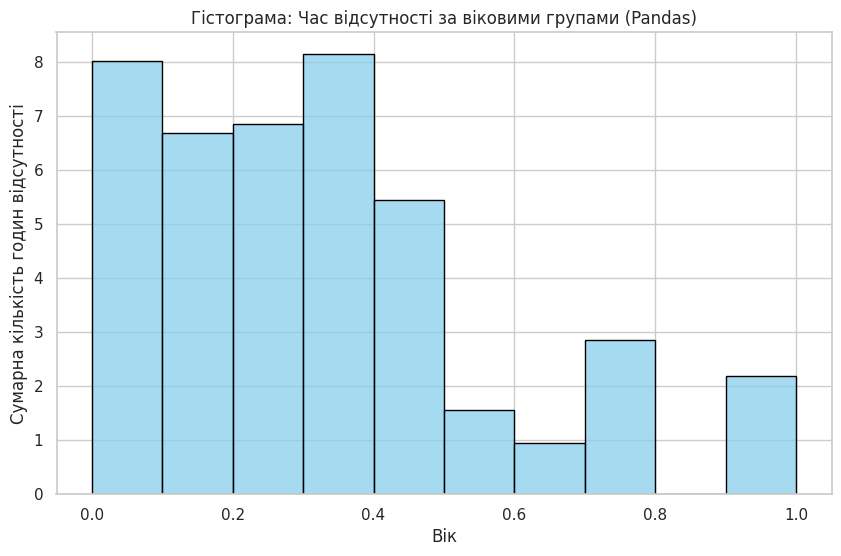

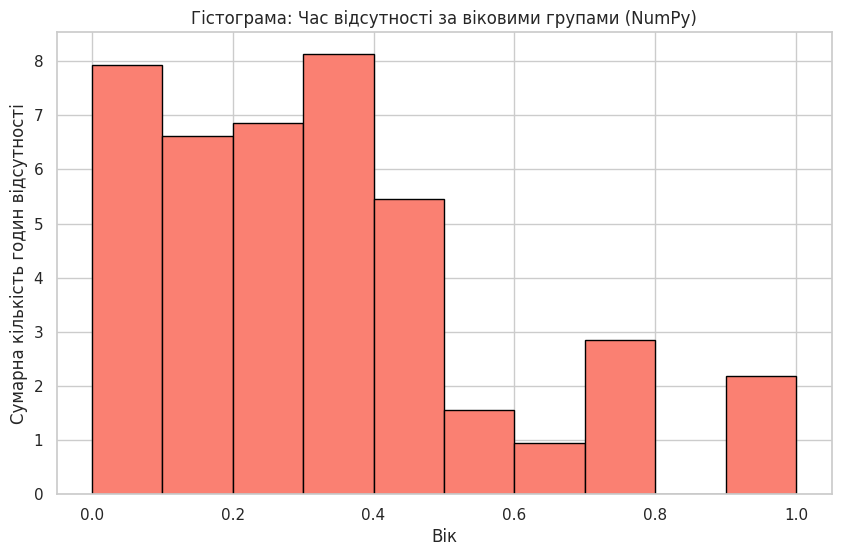

In [6]:
abs_hours = df_norm['Absenteeism time in hours'].astype(float)
ages = df_norm['Age'].astype(float)

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_norm,
    x='Age',
    weights=abs_hours,
    bins=10,
    binrange=(ages.min(), ages.max()),
    color='skyblue',
    edgecolor='black'
)
plt.xlabel('Вік')
plt.ylabel('Сумарна кількість годин відсутності')
plt.title('Гістограма: Час відсутності за віковими групами (Pandas)')
plt.grid(True)
plt.show()


ages_np = np_norm['Age'].astype(float)
abs_hours_np = np_norm['Absenteeism time in hours'].astype(float)

plt.figure(figsize=(10, 6))
plt.hist(
    ages_np,
    bins=10,
    weights=abs_hours_np,
    range=(ages_np.min(), ages_np.max()),
    color='salmon',
    edgecolor='black'
)
plt.xlabel('Вік')
plt.ylabel('Сумарна кількість годин відсутності')
plt.title('Гістограма: Час відсутності за віковими групами (NumPy)')
plt.grid(True)
plt.show()


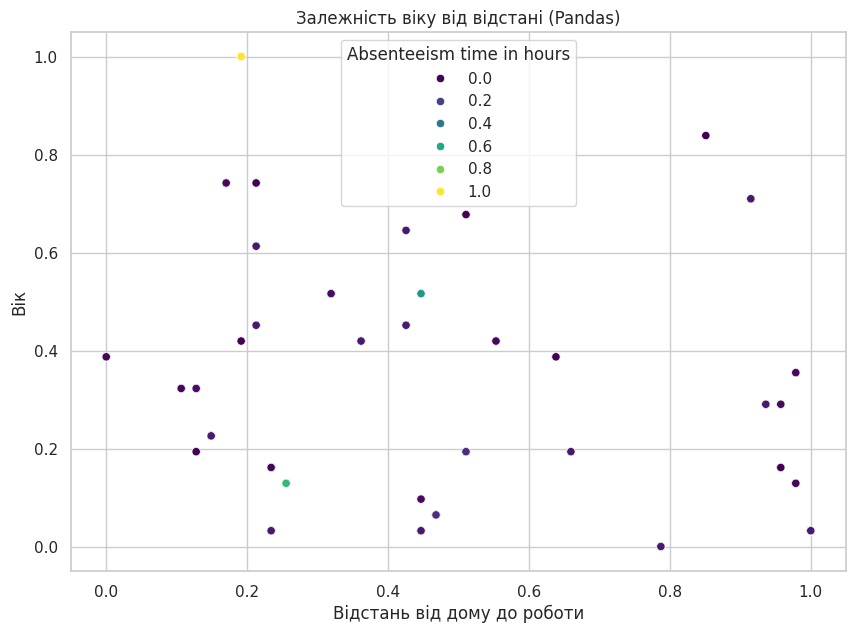

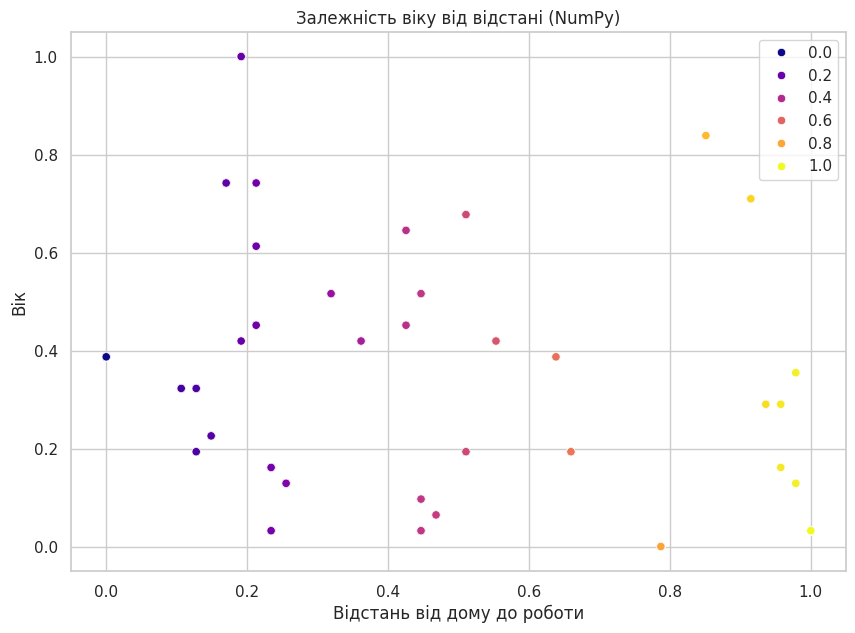

In [7]:
plt.figure()
sns.scatterplot(data=df_norm, x='Distance from Residence to Work', y='Age', hue='Absenteeism time in hours', palette='viridis')
plt.xlabel('Відстань від дому до роботи')
plt.ylabel('Вік')
plt.title('Залежність віку від відстані (Pandas)')
plt.grid(True)
plt.show()

dist_np = np_norm['Distance from Residence to Work'].astype(float)
age_np_vals = np_norm['Age'].astype(float)

plt.figure()
sns.scatterplot(x=dist_np, y=age_np_vals, hue=dist_np, palette='plasma')
plt.xlabel('Відстань від дому до роботи')
plt.ylabel('Вік')
plt.title('Залежність віку від відстані (NumPy)')
plt.grid(True)
plt.show()

In [8]:
age_vals = df_norm['Age'].astype(float)
dist_vals = df_norm['Distance from Residence to Work'].astype(float)

p_corr, _ = pearsonr(age_vals, dist_vals)
s_corr, _ = spearmanr(age_vals, dist_vals)

print(f"Коефіцієнт Пірсона (Pandas): {p_corr:.3f}")
print(f"Коефіцієнт Спірмена (Pandas): {s_corr:.3f}\n")

age_np_corr = np_norm['Age'].astype(float)
dist_np_corr = np_norm['Distance from Residence to Work'].astype(float)

p_corr_np, _ = pearsonr(age_np_corr, dist_np_corr)
s_corr_np, _ = spearmanr(age_np_corr, dist_np_corr)

print(f"Коефіцієнт Пірсона (NumPy): {p_corr_np:.3f}")
print(f"Коефіцієнт Спірмена (NumPy): {s_corr_np:.3f}\n")

Коефіцієнт Пірсона (Pandas): -0.146
Коефіцієнт Спірмена (Pandas): -0.148

Коефіцієнт Пірсона (NumPy): -0.138
Коефіцієнт Спірмена (NumPy): -0.140



In [9]:
encoder = OneHotEncoder(sparse_output=False)
reason_encoded = encoder.fit_transform(df_norm[['Reason for absence']])
reason_cols = encoder.get_feature_names_out(['Reason for absence'])
df_reason = pd.DataFrame(reason_encoded, columns=reason_cols, index=df_norm.index)
df_final = pd.concat([df_norm, df_reason], axis=1)
print("DataFrame після One Hot Encoding (перші 5 рядків):")
print(df_final.head(), "\n")

unique_reasons = np.unique(np_norm['Reason for absence'])
reason_map = {reason: idx for idx, reason in enumerate(unique_reasons)}
reason_indices = np.vectorize(reason_map.get)(np_norm['Reason for absence'])
one_hot = np.eye(len(unique_reasons))[reason_indices]
np_one_hot = np.hstack((np_clean, one_hot))
print("NumPy масив після One Hot Encoding (перші 5 рядків):")
print(np_one_hot[:5])

DataFrame після One Hot Encoding (перші 5 рядків):
   ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                26.0                 7                3        1   
1  36                 0.0                 7                3        1   
2   3                23.0                 7                4        1   
3   7                 7.0                 7                5        1   
4  11                23.0                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  \
0                0.396296                         0.659574      0.428571   
1                0.000000                         0.170213      0.607143   
2                0.225926                         0.978723      0.607143   
3                0.596296                         0.000000      0.464286   
4                0.396296                         0.659574      0.428571   

        Age  Work load Average/day  ...  Reason for a

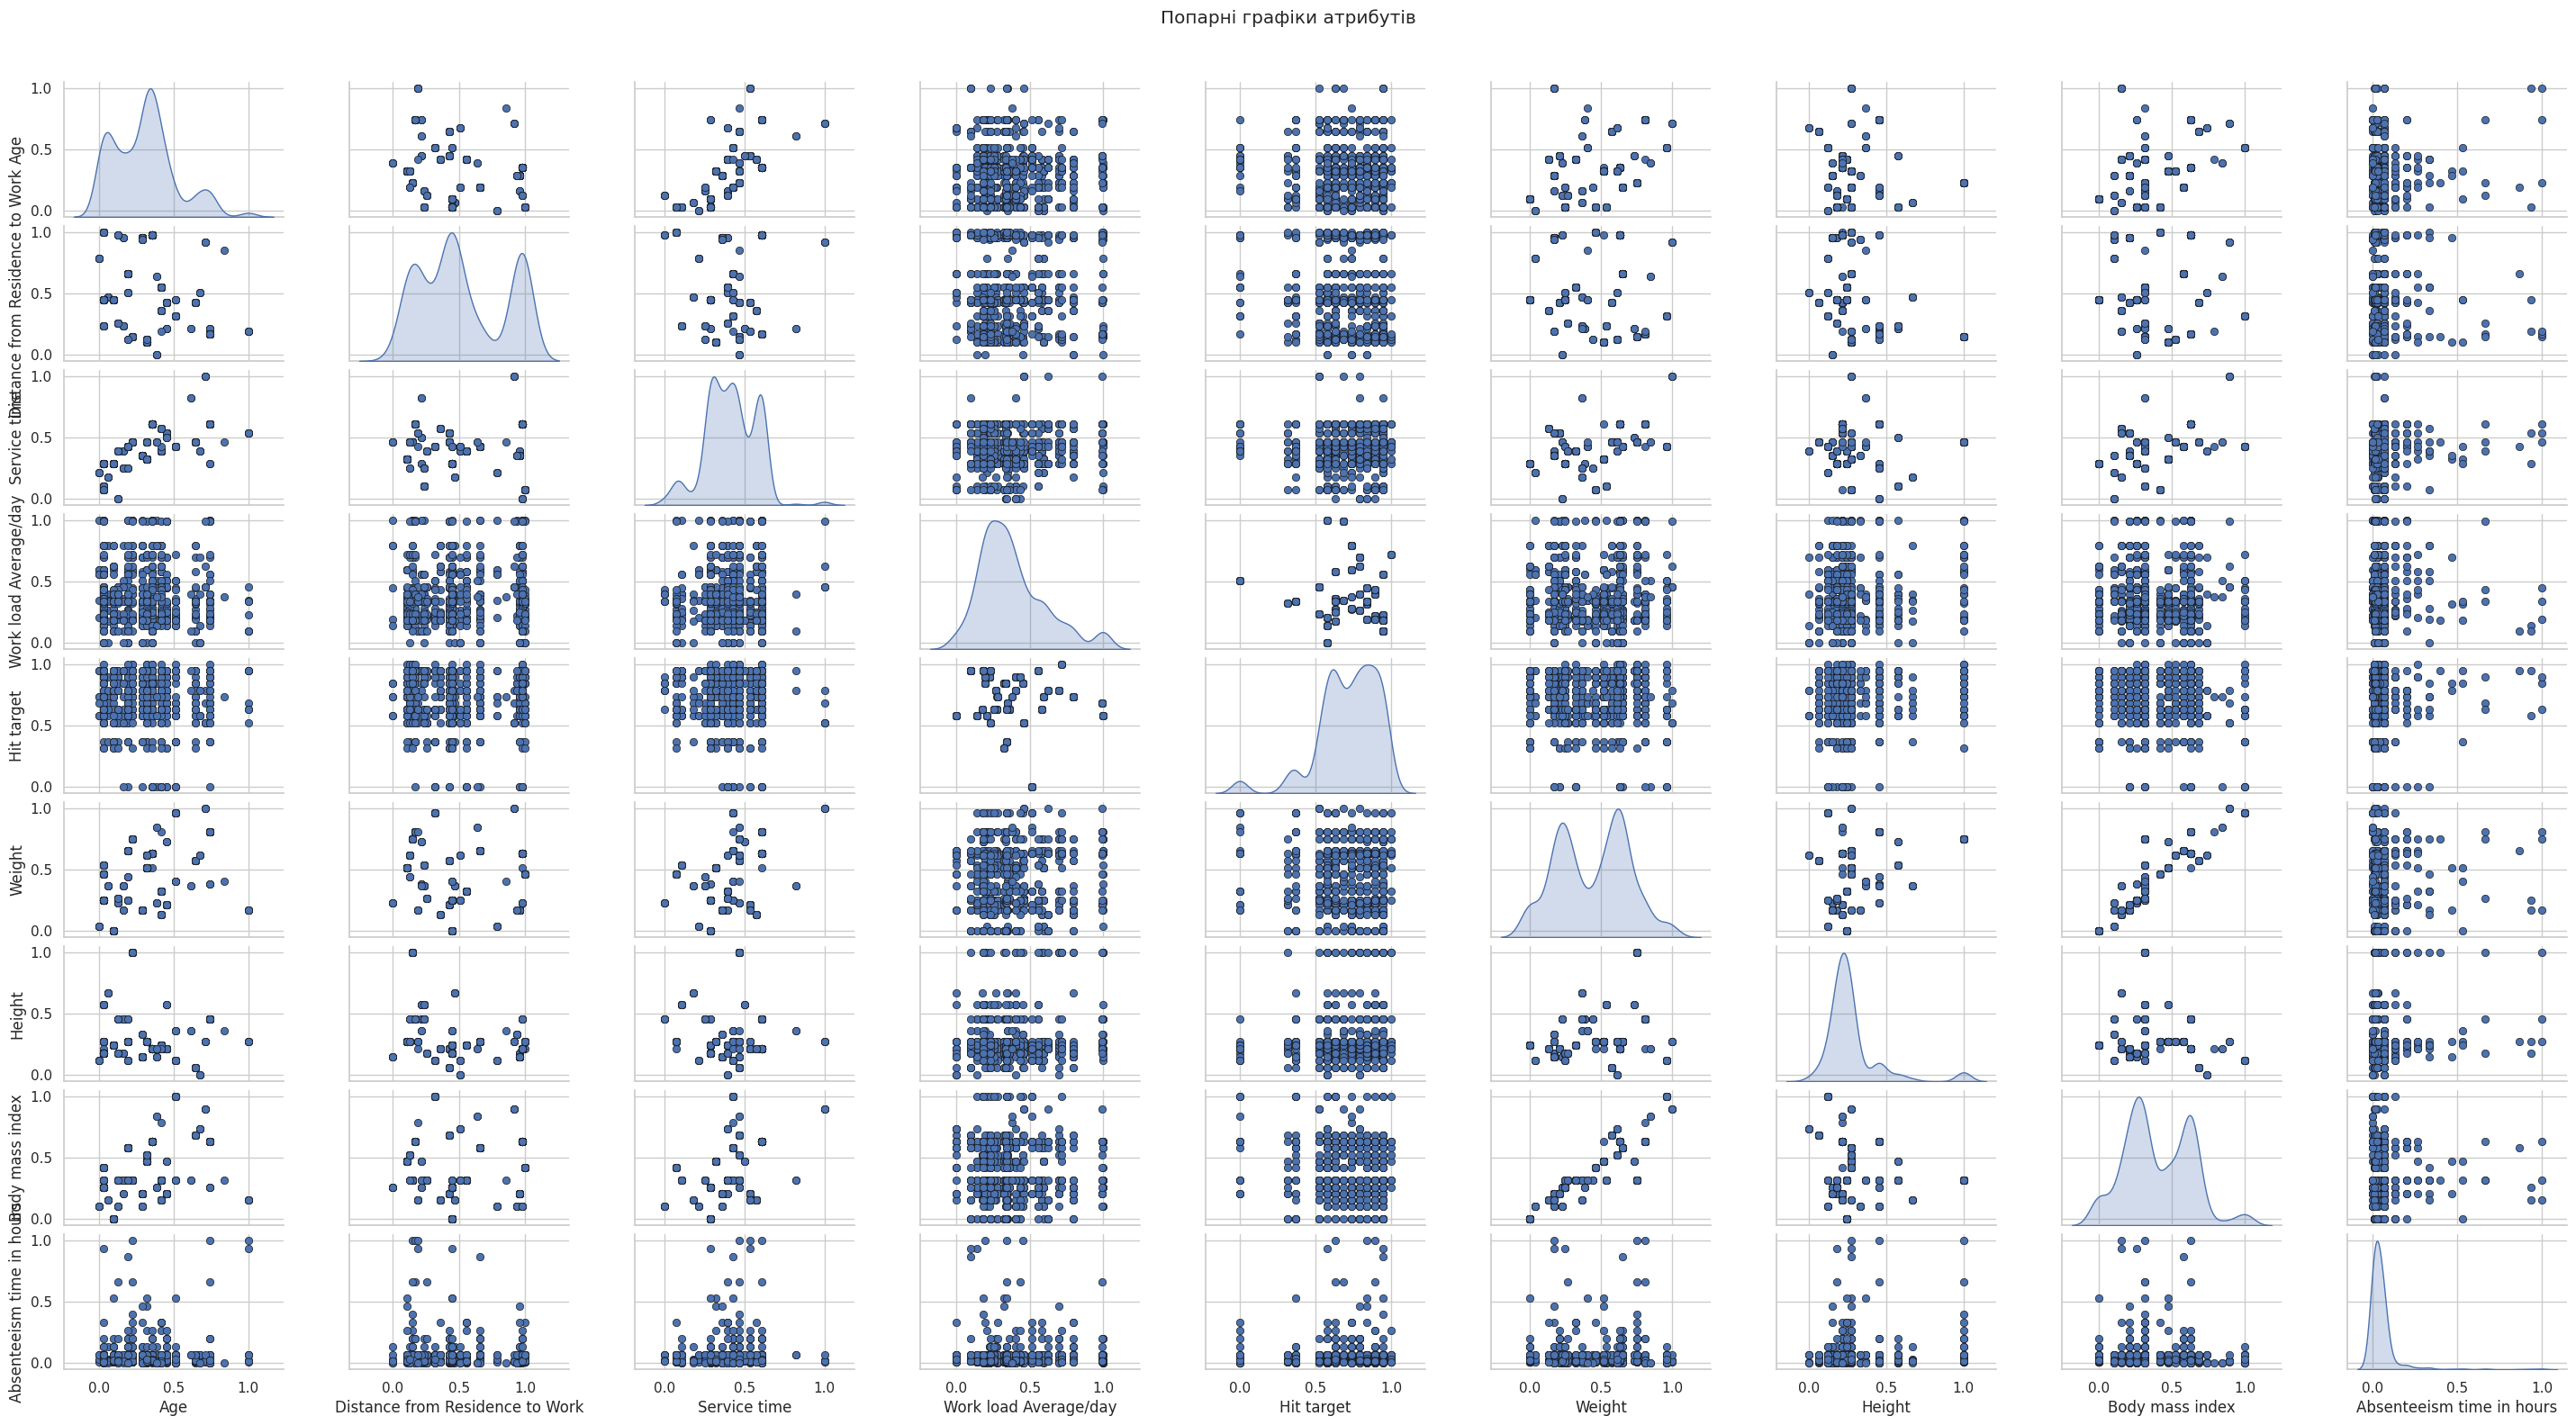

In [10]:
num_cols = ['Age', 'Distance from Residence to Work', 'Service time', 'Work load Average/day', 'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']
pair_plot = sns.pairplot(df_norm[num_cols], height=1.8, aspect=1.8, 
                         plot_kws=dict(edgecolor="k", linewidth=0.5), 
                         diag_kind="kde", diag_kws=dict(fill=True))
pair_plot.fig.subplots_adjust(top=0.93, wspace=0.3)
pair_plot.fig.suptitle('Попарні графіки атрибутів')
plt.show()